In [1]:
import pandas as pd
import numpy as np
import yfinance  as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der
figsize = (12, 8) 

In [28]:
# bentley systems, inc. 16.2 low esg risk
# Foxconn Industrial Internet Co., Ltd. 18.4 low esg risk
# Hon Hai Precision Industry Co., Ltd. 10.4 low esg risk 
symbols_list = ["BSY", "601138.SS", "2317.TW"]
count = len(symbols_list)
symbols = []

for ticker in symbols_list:
    tick = yf.Ticker(ticker)
    history = tick.history(period='max')
    history['Symbol'] = ticker
    symbols.append(history)

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df = df.drop_duplicates()
price = df.pivot('Date','Symbol','Close').reset_index()
price['Date'] = pd.to_datetime(price['Date'], utc=True)
price['Date'] = price['Date'].dt.date
# price.index = price.Date
price = price.set_index('Date')
price.index = pd.to_datetime(price.index)
# price.drop(columns=['Date'], inplace=True)  
price.head()

C:\Users\User\AppData\Local\Temp\ipykernel_19384\479624428.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  price = df.pivot('Date','Symbol','Close').reset_index()


Symbol,2317.TW,601138.SS,BSY
Date,,,
1993-01-04,0.429563,NaN,NaN
1993-01-05,0.422343,NaN,NaN
1993-01-06,0.420538,NaN,NaN
1993-01-07,0.407904,NaN,NaN
1993-01-10,0.410611,NaN,NaN


In [30]:
price.columns

Index(['2317.TW', '601138.SS', 'BSY'], dtype='object', name='Symbol')

# Monthly Price

In [29]:
month_price = price.resample("1m").agg("last")
month_price

Symbol,2317.TW,601138.SS,BSY
Date,,,
1993-01-31,0.446709,NaN,NaN
1993-02-28,0.460246,NaN,NaN
1993-03-31,0.509880,NaN,NaN
1993-04-30,0.469270,NaN,NaN
1993-05-31,0.420538,NaN,NaN
...,...,...,...
2023-01-31,100.000000,9.580000,39.002354
2023-02-28,102.000000,9.960000,40.459999
2023-03-31,104.000000,17.219999,42.990002


In [31]:
month_ret = month_price.pct_change()
month_ret

Symbol,2317.TW,601138.SS,BSY
Date,,,
1993-01-31,NaN,NaN,NaN
1993-02-28,0.030304,NaN,NaN
1993-03-31,0.107843,NaN,NaN
1993-04-30,-0.079646,NaN,NaN
1993-05-31,-0.103846,NaN,NaN
...,...,...,...
2023-01-31,0.001001,0.043573,0.056548
2023-02-28,0.020000,0.039666,0.037373
2023-03-31,0.019608,0.728916,0.062531


In [12]:
month_ret = month_ret.iloc[-61:-1]
month_ret

Symbol,2330.TW,6505.TW,AAPL
Date,,,
2018-04-30,-0.077236,0.016736,-0.015020
2018-05-31,-0.013216,0.000000,0.135124
2018-06-30,0.001744,0.008230,-0.009418
2018-07-31,0.136259,0.036777,0.027983
2018-08-31,0.040650,0.045643,0.200422
2018-09-30,0.025391,0.174603,-0.008303
2018-10-31,-0.108572,-0.175676,-0.030478
2018-11-30,-0.036325,-0.086066,-0.181198
2018-12-31,0.000000,-0.022422,-0.116698


# Mean and Std

In [32]:
mean = month_ret.mean()
mean = mean * 12
mean 

Symbol
2317.TW      0.282119
601138.SS    0.045848
BSY          0.208865
dtype: float64

In [33]:
std = month_ret.std()
std = std * np.sqrt(12)
std 

Symbol
2317.TW      0.487151
601138.SS    0.427833
BSY          0.368698
dtype: float64

# Distribution Chart

In [34]:
month_ret.columns 

Index(['2317.TW', '601138.SS', 'BSY'], dtype='object', name='Symbol')

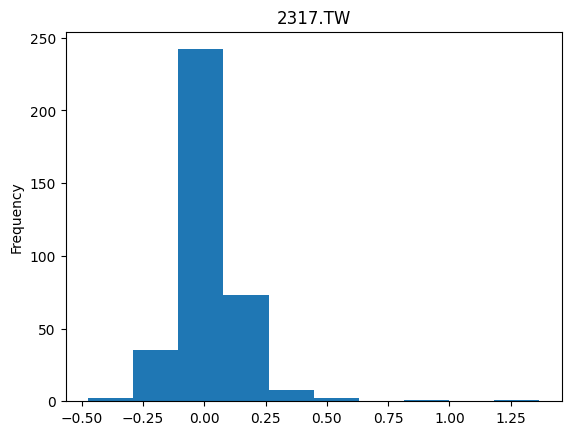

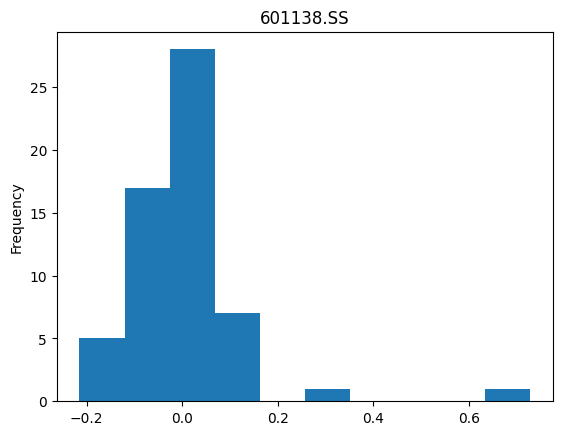

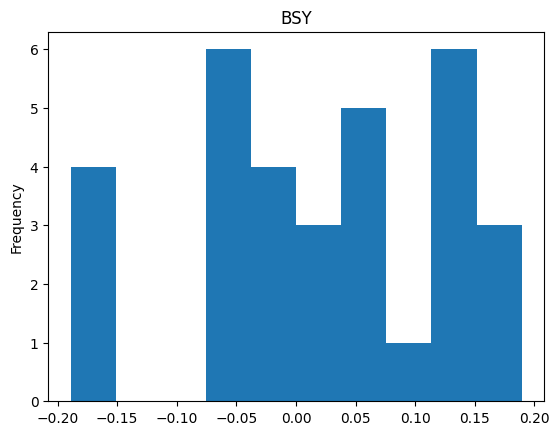

In [35]:
for symbol in month_ret.columns:
    month_ret[symbol].plot.hist()
    plt.title(symbol)
    plt.show()

# Covariance

In [39]:
cov = month_ret.cov()

cov_matrix = month_ret.apply(lambda x: np.log(1+x)).cov()
cov_matrix, cov
cov

Symbol,2317.TW,601138.SS,BSY
Symbol,,,
2317.TW,0.019776,0.002873,0.000500
601138.SS,0.002873,0.015253,0.002003
BSY,0.000500,0.002003,0.011328


# Assets

In [40]:
assets = pd.concat([mean, std], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbol,,
2317.TW,0.282119,0.487151
601138.SS,0.045848,0.427833
BSY,0.208865,0.368698


In [41]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(price.columns)
num_portfolios = 10000

num_assets 

3

In [42]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, mean)
    p_ret.append(returns)
    var = np.dot(weights.T, np.dot(cov, weights))
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(12)
    p_vol.append(ann_sd)

In [43]:
data = {'Returns':p_ret, 'Volatility':p_vol}
pd.DataFrame( data )

,Returns,Volatility
0,0.165665,0.321595
1,0.147017,0.282785
2,0.123135,0.318745
3,0.155907,0.318845
4,0.182536,0.286010
...,...,...
9995,0.198915,0.277042
9996,0.177122,0.269192
9997,0.246386,0.325959
9998,0.149294,0.296529


In [44]:
for counter, symbol in enumerate(price.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
print(counter)  

2


In [45]:
rf = 0.025
portfolios = pd.DataFrame(data)
portfolios['Sharpe Ratio'] = (portfolios['Returns']-rf) / portfolios['Volatility']
portfolios.head()

,Returns,Volatility,2317.TW weight,601138.SS weight,BSY weight,Sharpe Ratio
0,0.165665,0.321595,0.441108,0.463220,0.095672,0.437399
1,0.147017,0.282785,0.209458,0.473519,0.317023,0.431483
2,0.123135,0.318745,0.225368,0.627169,0.147463,0.307879
3,0.155907,0.318845,0.396507,0.503039,0.100454,0.410566
4,0.182536,0.286010,0.390273,0.336883,0.272844,0.550808


<Axes: xlabel='Volatility', ylabel='Returns'>

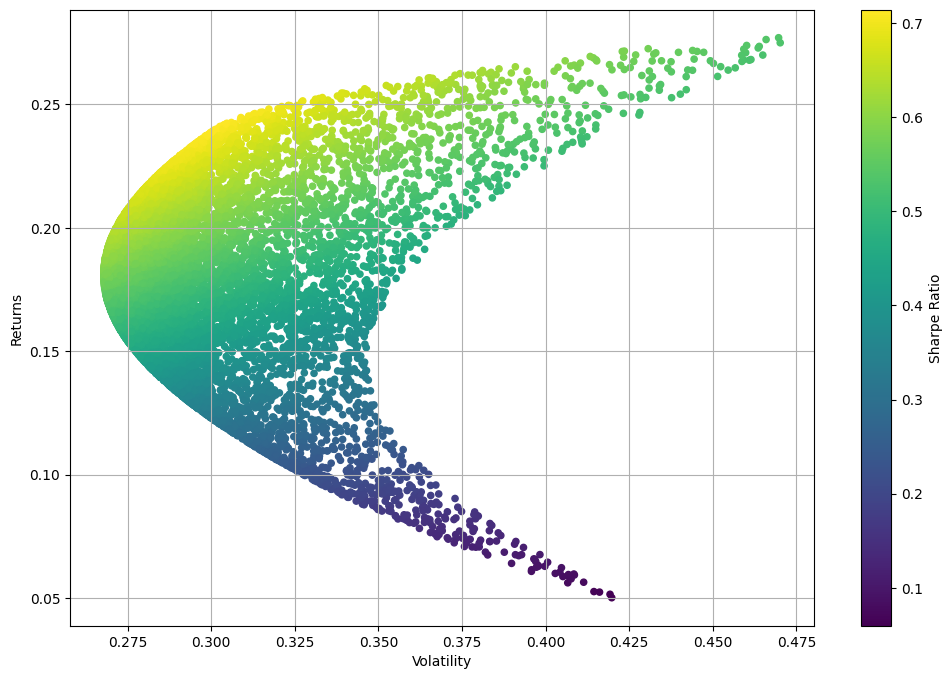

In [46]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)

# Minimun Variance

In [47]:
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,2317.TW weight,601138.SS weight,BSY weight,Sharpe Ratio
1024,0.180564,0.267913,0.251979,0.286839,0.461182,0.580651


In [48]:
min_var_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_var_port

Returns             0.180564
Volatility          0.267913
2317.TW weight      0.251979
601138.SS weight    0.286839
BSY weight          0.461182
Sharpe Ratio        0.580651
Name: 1024, dtype: float64

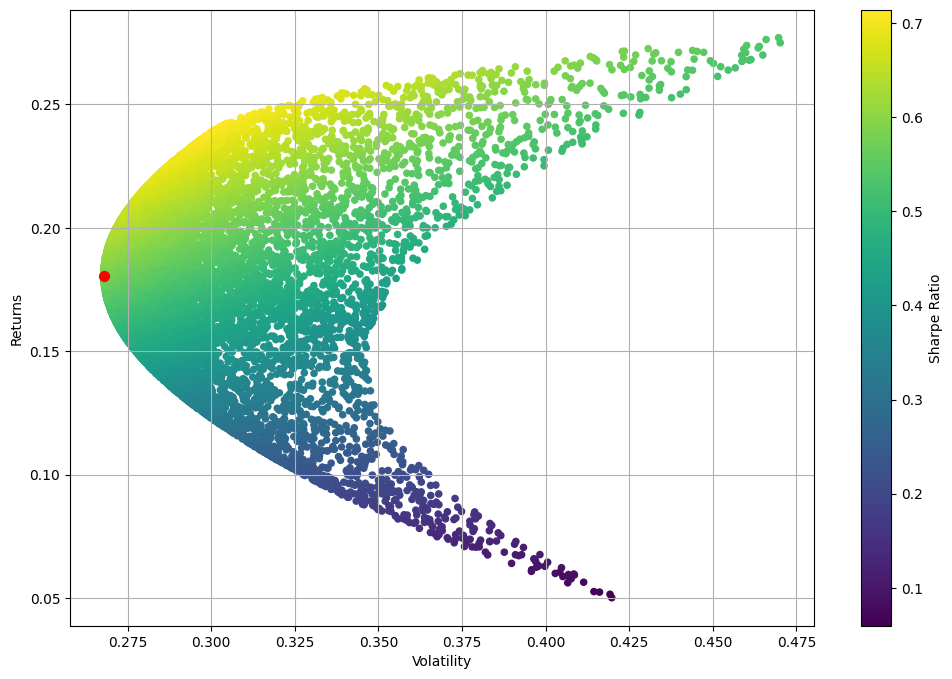

In [49]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port[1], min_var_port[0], color='r', s=50)

# Max Sharpe Ratio

$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

In [50]:
((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()

5159

In [51]:
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns             0.241099
Volatility          0.302638
2317.TW weight      0.443892
601138.SS weight    0.001736
BSY weight          0.554372
Sharpe Ratio        0.714050
Name: 5159, dtype: float64

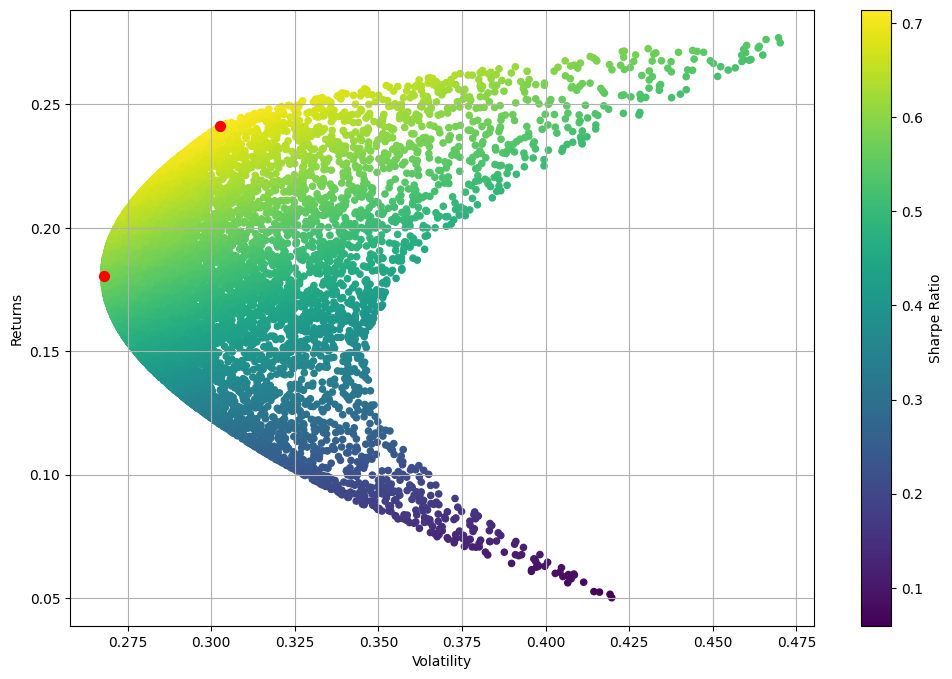

In [52]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port[1], min_var_port[0], color='r', s=50)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='r', s= 50)

# Capital Allocation Line

$$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$

In [53]:
cal_x = []
cal_y = []

In [54]:
for er in np.linspace(rf, max(p_ret), 20):
    sd = (er - rf)/((optimal_risky_port[0]-rf)/optimal_risky_port[1])
    cal_x.append(sd)
    cal_y.append(er)

In [55]:
data2 = {'cal_y':cal_y, 'cal_x':cal_x}
cal = pd.DataFrame(data2)
cal.head()

,cal_y,cal_x
0,0.025000,0.000000
1,0.038266,0.018578
2,0.051531,0.037156
3,0.064797,0.055734
4,0.078062,0.074312


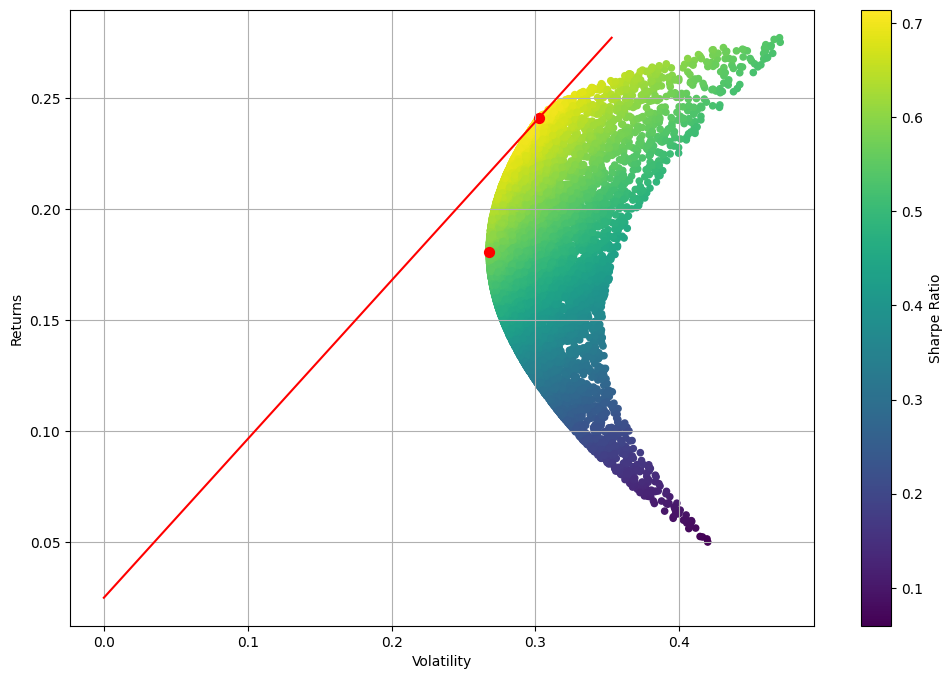

In [56]:
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.scatter(min_var_port[1], min_var_port[0], color='r', s=50)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='r', s= 50)
plt.plot(cal_x, cal_y, color='r')

# Efficient Frontier

In [57]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(month_ret.mean() * weights) * 12
    vol = np.sqrt(np.dot(weights.T, np.dot(month_ret.cov()*12, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [58]:
frontier_y = np.linspace(0.08, 0.34, 50)
frontier_y

array([0.08      , 0.08530612, 0.09061224, 0.09591837, 0.10122449,
       0.10653061, 0.11183673, 0.11714286, 0.12244898, 0.1277551 ,
       0.13306122, 0.13836735, 0.14367347, 0.14897959, 0.15428571,
       0.15959184, 0.16489796, 0.17020408, 0.1755102 , 0.18081633,
       0.18612245, 0.19142857, 0.19673469, 0.20204082, 0.20734694,
       0.21265306, 0.21795918, 0.22326531, 0.22857143, 0.23387755,
       0.23918367, 0.2444898 , 0.24979592, 0.25510204, 0.26040816,
       0.26571429, 0.27102041, 0.27632653, 0.28163265, 0.28693878,
       0.2922449 , 0.29755102, 0.30285714, 0.30816327, 0.31346939,
       0.31877551, 0.32408163, 0.32938776, 0.33469388, 0.34      ])

In [59]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [60]:
bounds = tuple( [ (0,1) for i in range(count) ] )
init_guess = [1/count] * count 

In [61]:
bounds 

((0, 1), (0, 1), (0, 1))

In [62]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

<Figure size 1200x800 with 0 Axes>

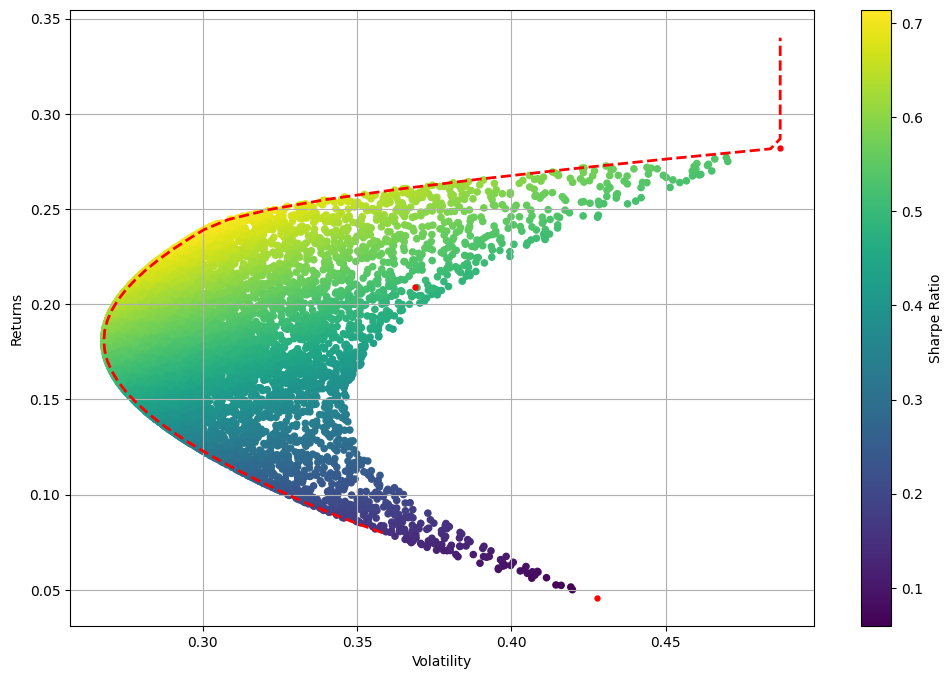

In [63]:
plt.figure(figsize=(12,8))
portfolios.plot.scatter(x='Volatility', y='Returns', c="Sharpe Ratio", cmap='viridis', grid=True, figsize=figsize)
plt.plot(frontier_x,frontier_y, 'r--', linewidth=2)

# plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
# plt.scatter(min_var_vol, min_var_ret,c='red',marker='x', s=50) # red dot
# plt.scatter(max_sr_vol2, max_sr_ret2,c='purple', s=50) # red dot
# plt.scatter(min_var_vol2, min_var_ret2,c='purple',marker='x', s=50) # red dot

plt.scatter(std, mean,c='red',marker='.', s=50) # red dot
# plt.savefig('cover.png')
plt.show()

# Utility Function

In [68]:
A= 4 
# indifference_sigma = np.linspace(0, 0.15, 100)
# indifference_return = U + 0.5 * A * np.square( indifference_sigma )


In [65]:
optimal_y = (optimal_risky_port[0] - rf) / (A*optimal_risky_port[1]**2)
optimal_y

0.589853784116481

In [66]:
optimal_u = rf + optimal_y * (optimal_risky_port[0] - rf) - 0.5*A*optimal_y**2*optimal_risky_port[1]**2
optimal_u

0.08873334587353754